In [ ]:
import pandas as pd
import re
import spacy
import pandas as pd
from spacy import displacy
import spacy
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import scattertext as st
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [ ]:

train_df = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin1')
test_df = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin1')

In [ ]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
train_df['Tweet_texts'] = train_df['Location'] + ' ' + train_df['TweetAt'] + ' ' + train_df['OriginalTweet']
test_df['Tweet_texts'] = test_df['Location'] + ' ' + test_df['TweetAt'] + ' ' + test_df['OriginalTweet']
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_texts
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London 16-03-2020 @MeNyrbie @Phil_Gahan @Chris...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK 16-03-2020 advice Talk to your neighbours f...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds 16-03-2020 Coronavirus Australia: Wo...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,NaN
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,NaN


In [ ]:
# Load Spacy NLP model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Function to clean and preprocess text
def clean_and_preprocess(text):
    if not isinstance(text, str):
        return ""

    # 2.1 Remove the date and time in the tweets using a regular expression.
    text = re.sub(r'\b(?:\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{1,2}:\d{2}(:\d{2})?(?:\s?[APap][Mm])?)\b', '', text)

    # 2.2 Remove the hyperlink URL in the tweets using a regular expression.
    text = re.sub(r'http\S+|www\S+', '', text)

    # 2.3 Remove the Twitter hashtags(# before a relevant keyword or phrase ) in the tweets using a regular expression.
    text = re.sub(r'#\w+', '', text)

    # 2.4 Remove the usernames (also known as the handle –– begins with the “@” symbol) using a regular expression.
    text = re.sub(r'@\w+', '', text)

    # 2.5 Remove all special characters, punctuation using a regular expression.
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # 2.6 Remove all words containing at most two characters such as "a", "an", "in", "on", etc.
    text = re.sub(r'\b\w{1,2}\b', '', text)


    text = text.strip()

    return text

# Load datasets
train_df = train_df.dropna(subset=['Tweet_texts']).copy()
test_df = test_df.dropna(subset=['Tweet_texts']).copy()

train_df['Tweet_texts'] = train_df['Tweet_texts'].astype(str).apply(clean_and_preprocess)
test_df['Tweet_texts'] = test_df['Tweet_texts'].astype(str).apply(clean_and_preprocess)

In [ ]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_texts
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk your neighbours family exchange ...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds Coronavirus Australia Woolworths g...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,3631970882363649 news the regions first con...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,3592654178753267 Cashier grocery store was s...


In [ ]:
train_df = train_df[train_df['Tweet_texts'].str.strip() != '']
test_df = test_df[test_df['Tweet_texts'].str.strip() != '']

In [ ]:
train_df['POS_tags'] = train_df['Tweet_texts'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])
test_df['POS_tags'] = test_df['Tweet_texts'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])

In [ ]:

for index in range(5):
    doc = nlp(train_df['Tweet_texts'].iloc[index])
    displacy.render(doc, style='dep', jupyter=True)

In [ ]:
for index in range(10):
    doc = nlp(train_df['Tweet_texts'].iloc[index])
    displacy.render(doc, style='ent', jupyter=True)

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:


nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    geolocation = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    money = [ent.text for ent in doc.ents if ent.label_ == 'MONEY']
    quantity = [ent.text for ent in doc.ents if ent.label_ == 'QUANTITY']
    ordinal = [ent.text for ent in doc.ents if ent.label_ == 'ORDINAL']
    return geolocation, money, quantity, ordinal

In [ ]:


nlp = spacy.load("en_core_web_sm")

def extract_entities_sample(df, sample_size=50):
    geolocations = []
    monies = []
    quantities = []
    ordinals = []

    for text in df['Tweet_texts']:
        doc = nlp(text)
        geo = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
        money = [ent.text for ent in doc.ents if ent.label_ == 'MONEY']
        quantity = [ent.text for ent in doc.ents if ent.label_ == 'QUANTITY']
        ordinal = [ent.text for ent in doc.ents if ent.label_ == 'ORDINAL']

        geolocations.extend(geo)
        monies.extend(money)
        quantities.extend(quantity)
        ordinals.extend(ordinal)

    return geolocations[:sample_size], monies[:sample_size], quantities[:sample_size], ordinals[:sample_size]

sample_geo, sample_money, sample_quantity, sample_ordinal = extract_entities_sample(train_df)

print("Sample Geolocations:")
print(sample_geo)

print("\nSample Monies:")
print(sample_money)

print("\nSample Quantities:")
print(sample_quantity)

print("\nSample Ordinals:")
print(sample_ordinal)

Sample Geolocations:
['Sullivan County', 'Austria', 'Atlanta', 'USA', 'Atlanta', 'Canada', 'Chicago', 'Ill', 'Saudi Arabia', 'Ontario', 'Canada', 'Russia', 'Iran', 'Denver', 'china', 'china', 'London', 'Idaho', 'New York', 'London', 'Canada', 'United States  ', 'Fort Worth', 'Texas', 'Houston', 'USA', 'Vancouver', 'British Columbia', 'Midrand', 'Arkansas', 'USA', 'Washington', 'Washington', 'San Clemente', 'Dallas', 'Boston', 'London', 'New York City', 'Boston', 'Sydney', 'Boston', 'Bangkok', 'Thailand', 'Los Angeles', 'Houston', 'Massachusetts', 'the United States', 'Washington', 'San Joaquin Valley', 'Montgomery County']

Sample Monies:
['595 billion  ', 'tonight  cents', '779 cents', '100 000', '1billion dollars', '650 trillion', '400 per cent', 'kama', '406 billion', '213 billion', 'only  cents', '3hungar', 'Provide  billion', '899 cents', 'just  few pence', 'thousands  dollars', 'around  cents', 'million Californias  million', 'about  million pounds', '750 dollars', 'billion pound

In [ ]:
cleaned_train_df = train_df
cleaned_test_df = test_df

In [ ]:

nltk.download('punkt_tab')

def extract_tokens(text):
    tokens = word_tokenize(text)
    return tokens

train_df['Tokens'] = train_df['Tweet_texts'].apply(extract_tokens)
test_df['Tokens'] = test_df['Tweet_texts'].apply(extract_tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def lemmatize_text(tokens):
    doc = nlp(' '.join(tokens))
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

train_df['Tweet_texts'] = train_df['Tokens'].apply(lemmatize_text)
test_df['Tweet_texts'] = test_df['Tokens'].apply(lemmatize_text)

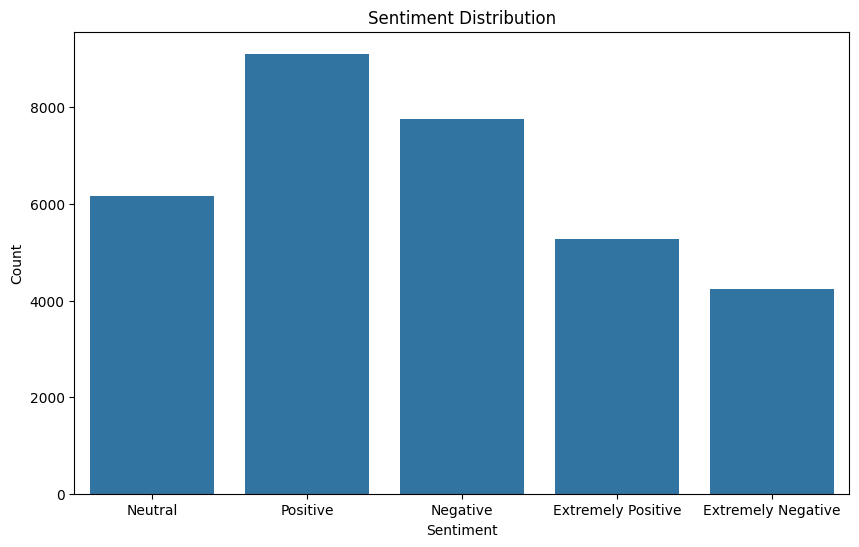

In [ ]:

plt.figure(figsize=(10, 6))

sns.countplot(x='Sentiment', data=train_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-20-0c63781e5277>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Sentiment']=='Positive', 'Text_Length'], label='Positive', shade=True)
<ipython-input-20-0c63781e5277>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Sentiment']=='Negative', 'Text_Length'], label='Negative', shade=True)
<ipython-input-20-0c63781e5277>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Sentiment']=='Neutral', 'Text_Length'], label='Neutral', shade=True)


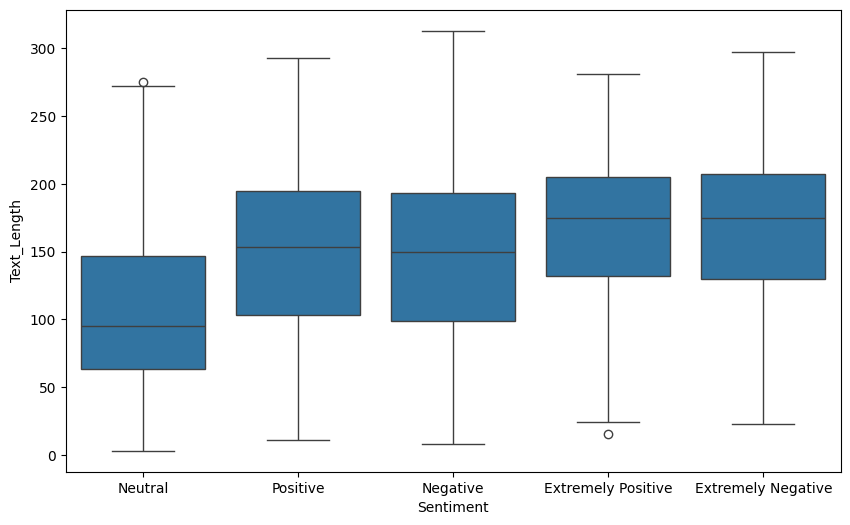

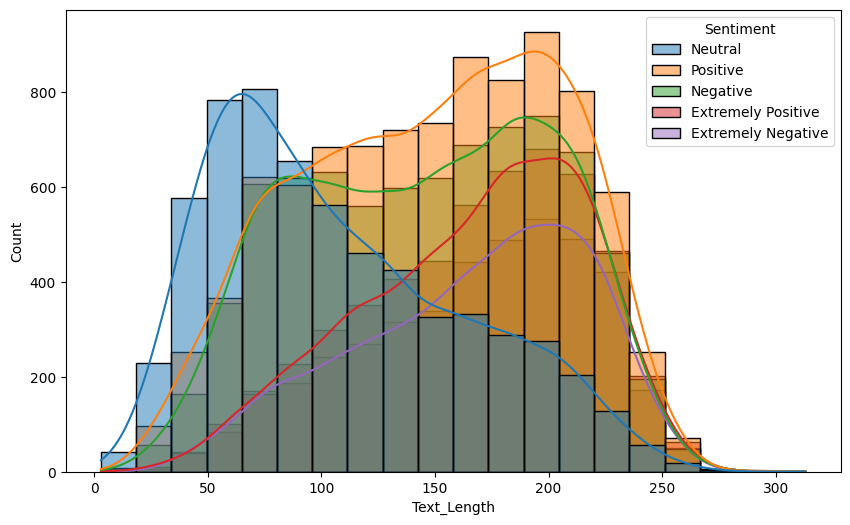

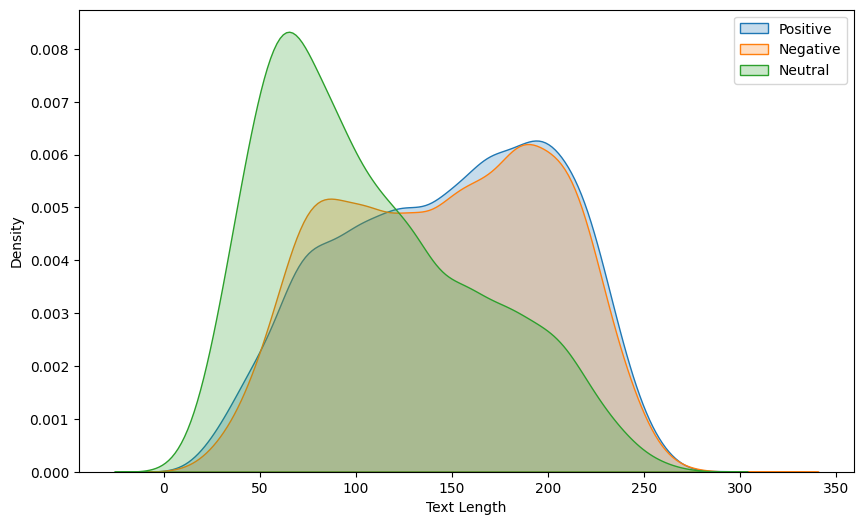

In [ ]:

train_df['Text_Length'] = train_df['Tweet_texts'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Text_Length', data=train_df)

plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='Text_Length', bins=20, hue='Sentiment', kde=True)

plt.figure(figsize=(10, 6))
sns.kdeplot(train_df.loc[train_df['Sentiment']=='Positive', 'Text_Length'], label='Positive', shade=True)
sns.kdeplot(train_df.loc[train_df['Sentiment']=='Negative', 'Text_Length'], label='Negative', shade=True)
sns.kdeplot(train_df.loc[train_df['Sentiment']=='Neutral', 'Text_Length'], label='Neutral', shade=True)
plt.legend()
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

<ipython-input-21-5bdac33d2104>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Sentiment']=='Positive', 'Word_Count'], label='Positive', shade=True)
<ipython-input-21-5bdac33d2104>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Sentiment']=='Negative', 'Word_Count'], label='Negative', shade=True)
<ipython-input-21-5bdac33d2104>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df.loc[train_df['Sentiment']=='Neutral', 'Word_Count'], label='Neutral', shade=True)


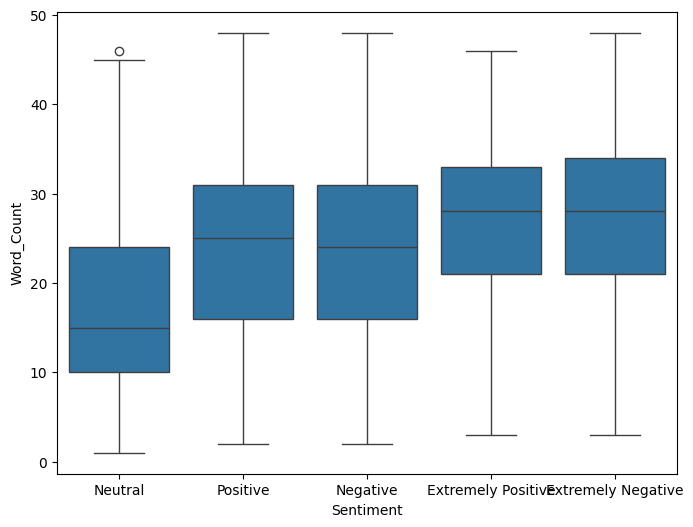

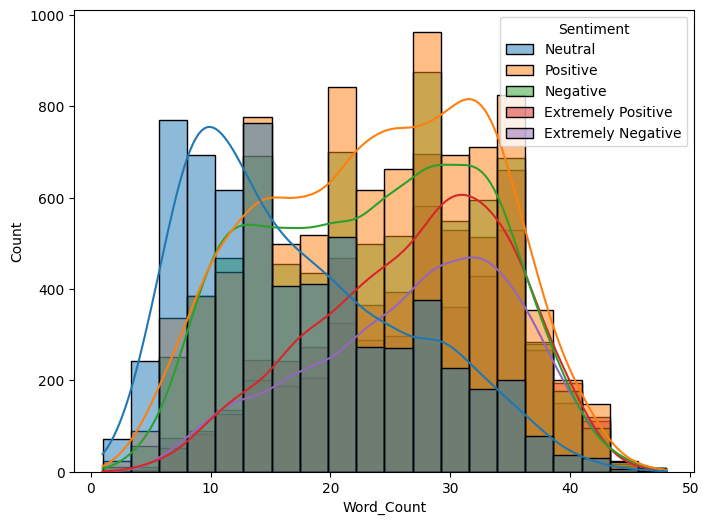

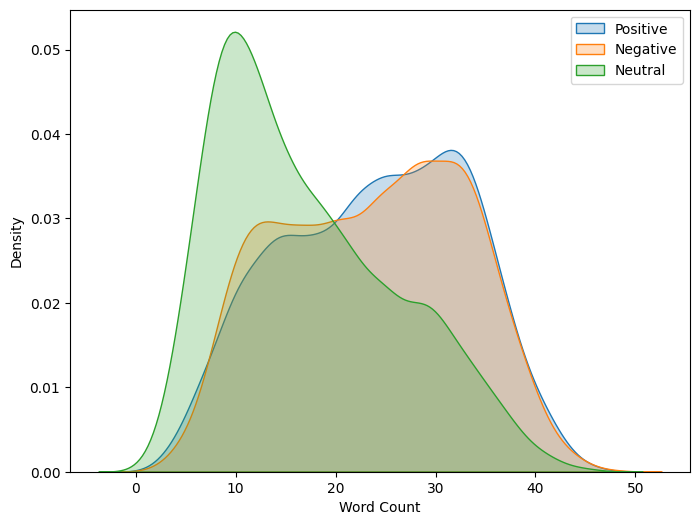

In [ ]:
train_df['Word_Count'] = train_df['Tokens'].apply(len)


plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Word_Count', data=train_df)


plt.figure(figsize=(8, 6))
sns.histplot(train_df, x='Word_Count', bins=20, hue='Sentiment', kde=True)


plt.figure(figsize=(8, 6))
sns.kdeplot(train_df.loc[train_df['Sentiment']=='Positive', 'Word_Count'], label='Positive', shade=True)
sns.kdeplot(train_df.loc[train_df['Sentiment']=='Negative', 'Word_Count'], label='Negative', shade=True)
sns.kdeplot(train_df.loc[train_df['Sentiment']=='Neutral', 'Word_Count'], label='Neutral', shade=True)
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.show()

In [ ]:

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Tweet_texts'])

feature_names = tfidf_vectorizer.get_feature_names_out()

sum_scores_unigrams = tfidf_matrix.sum(axis=0)
top_10_unigrams = [(feature_names[idx], sum_scores_unigrams[0, idx]) for idx in sum_scores_unigrams.argsort()[0, -10:]][::-1]
print("Top 10 Unigrams:", top_10_unigrams)

sum_scores_bigrams = tfidf_matrix[:, np.array(feature_names) != ''].sum(axis=0)
top_10_bigrams = [(feature_names[idx], sum_scores_bigrams[0, idx]) for idx in sum_scores_bigrams.argsort()[0, -10:]][::-1]
print("Top 10 Bigrams:", top_10_bigrams)

Top 10 Unigrams: [(array([['covid19', 'store', 'not', 'price', 'you', 'have', 'for', 'be',
        'and', 'the']], dtype=object), matrix([[ 613.10659392,  626.84503177,  638.80761439,  676.6944017 ,
          712.21574772,  736.16372361,  860.09349949, 1012.60197254,
         1196.61322088, 1815.29779441]]))]
Top 10 Bigrams: [(array([['covid19', 'store', 'not', 'price', 'you', 'have', 'for', 'be',
        'and', 'the']], dtype=object), matrix([[ 613.10659392,  626.84503177,  638.80761439,  676.6944017 ,
          712.21574772,  736.16372361,  860.09349949, 1012.60197254,
         1196.61322088, 1815.29779441]]))]


In [ ]:

def get_top_tf_idf_words(ngram_range, df = train_df, col = "Tweet_texts", use_idf = True, top_n= 10, ):

    tf_idf = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    feature_names = np.array(tf_idf.get_feature_names_out())
    tf_idf_sparse_matrix = tf_idf.transform(df[col])

    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]

    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx],
    })

top_n = 10

df_text_bc = get_top_tf_idf_words(df = train_df, col = "Tweet_texts", top_n= top_n,ngram_range =(2, 2))
df_text_ac = get_top_tf_idf_words(df = train_df, col = "Tweet_texts", top_n= top_n, ngram_range = (1,1))

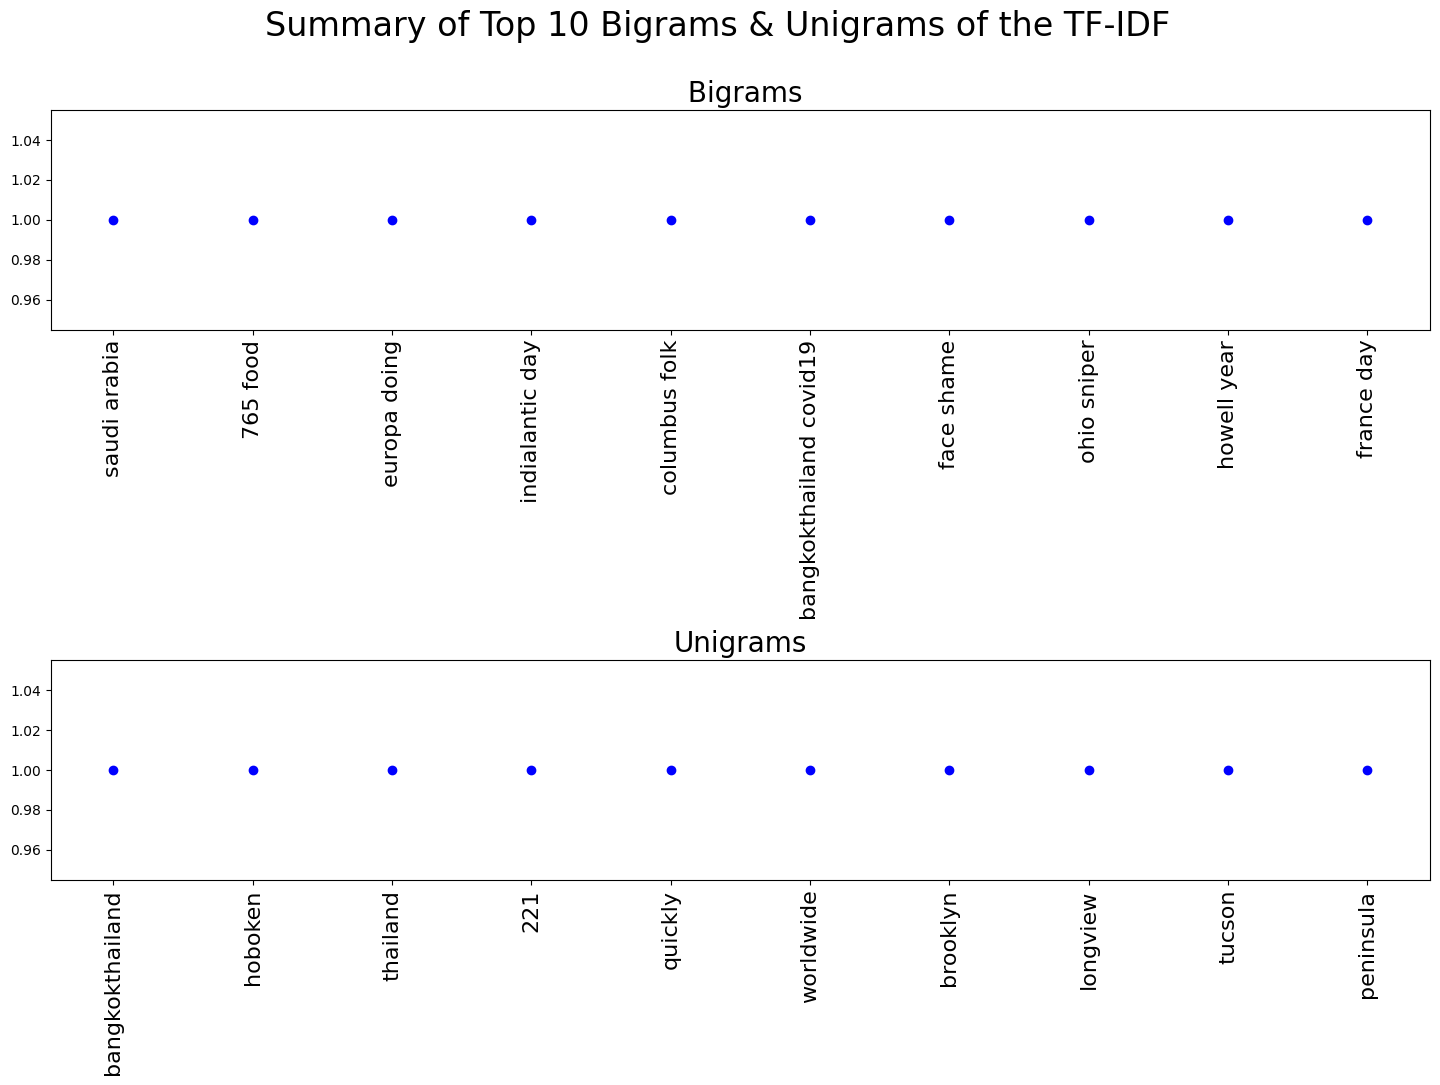

In [ ]:

x=range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))

fig.suptitle('Summary of Top 10 Bigrams & Unigrams of the TF-IDF', fontsize= 24)

ax[0].plot(x, df_text_bc.tf_idf, 'bo')
ax[0].set_title(' Bigrams', fontsize= 20)

ax[0].set_xticks(x)

x_ticks_labels = df_text_bc.feature
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)


ax[1].plot(x, df_text_ac.tf_idf, 'bo')
ax[1].set_title('Unigrams', fontsize= 20)

ax[1].set_xticks(x)

x_ticks_labels = df_text_ac.feature

ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

fig.subplots_adjust(hspace=1.5)
plt.show()

In [ ]:
!pip install scattertext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 11.7 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=a13965853efdfdbc94bfbee10cd570ba8097c5b8896c9d051a18309b791d2830
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext


In [ ]:


sentiment_categories = train_df['Sentiment'].unique()
print("Sentiment Categories:", sentiment_categories)

corpus = st.CorpusFromPandas(train_df, category_col='Sentiment', text_col='Tweet_texts').build()
term_freq_df = corpus.get_term_freq_df()
print(term_freq_df.head()
)

Sentiment Categories: ['Neutral' 'Positive' 'Negative' 'Extremely Positive' 'Extremely Negative']
            Neutral freq  Positive freq  Negative freq  \
term                                                     
london               351            488            424   
and                 2446           5569           4487   
london and             4             10              9   
and and                4              4              5   
advice                45             62             50   

            Extremely Positive freq  Extremely Negative freq  
term                                                          
london                          242                      271  
and                            3826                     2900  
london and                        2                        3  
and and                           7                        3  
advice                           54                       24  


In [ ]:
y = term_freq_df["Positive freq"].sort_values(ascending = False).head(10)
y

,Positive freq
term,
the,10273
and,5569
be,4117
for,3324
have,2573
you,2398
not,2039
store,1897
price,1731


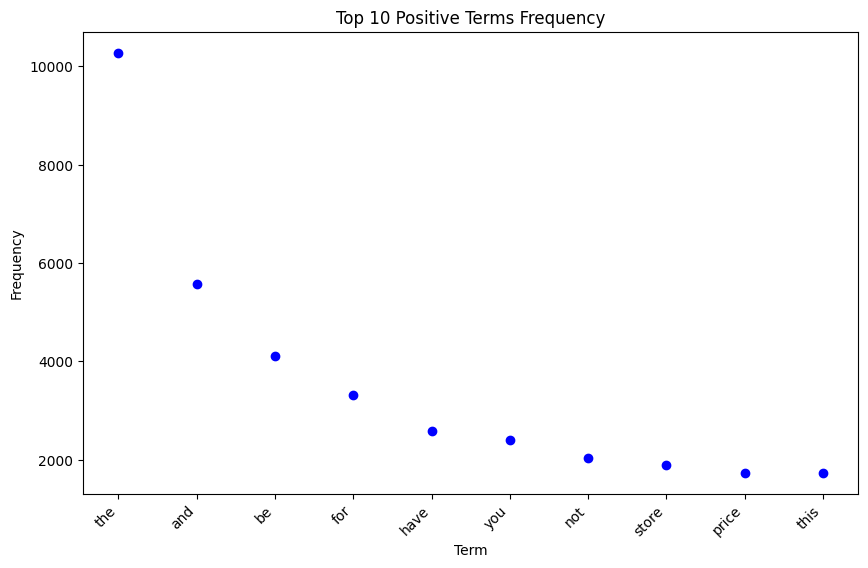

In [ ]:

terms = y.index
frequency = y.values

term_values = range(1, len(terms) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(term_values, frequency, color='blue', marker='o')

plt.title('Top 10 Positive Terms Frequency')
plt.xlabel('Term')
plt.ylabel('Frequency')

plt.xticks(term_values, terms, rotation=45, ha='right')

# Display the plot
plt.show()

In [ ]:
corpus_bc = st.CorpusFromPandas(train_df, category_col='Sentiment', text_col='Tweet_texts').build()
term_freq_df = corpus.get_term_freq_df()
print(term_freq_df.head()
)

            Neutral freq  Positive freq  Negative freq  \
term                                                     
london               351            488            424   
and                 2446           5569           4487   
london and             4             10              9   
and and                4              4              5   
advice                45             62             50   

            Extremely Positive freq  Extremely Negative freq  
term                                                          
london                          242                      271  
and                            3826                     2900  
london and                        2                        3  
and and                           7                        3  
advice                           54                       24  


In [ ]:

term_freq_df_bc = corpus_bc.get_term_freq_df()

term_freq_df_bc['positive Score'] = corpus_bc.get_scaled_f_scores('Positive')
term_freq_df_bc_Score = term_freq_df_bc.sort_values(by= 'positive Score', ascending=False)

term_freq_df_ac_Score = term_freq_df_bc.sort_values(by= 'positive Score', ascending=False)

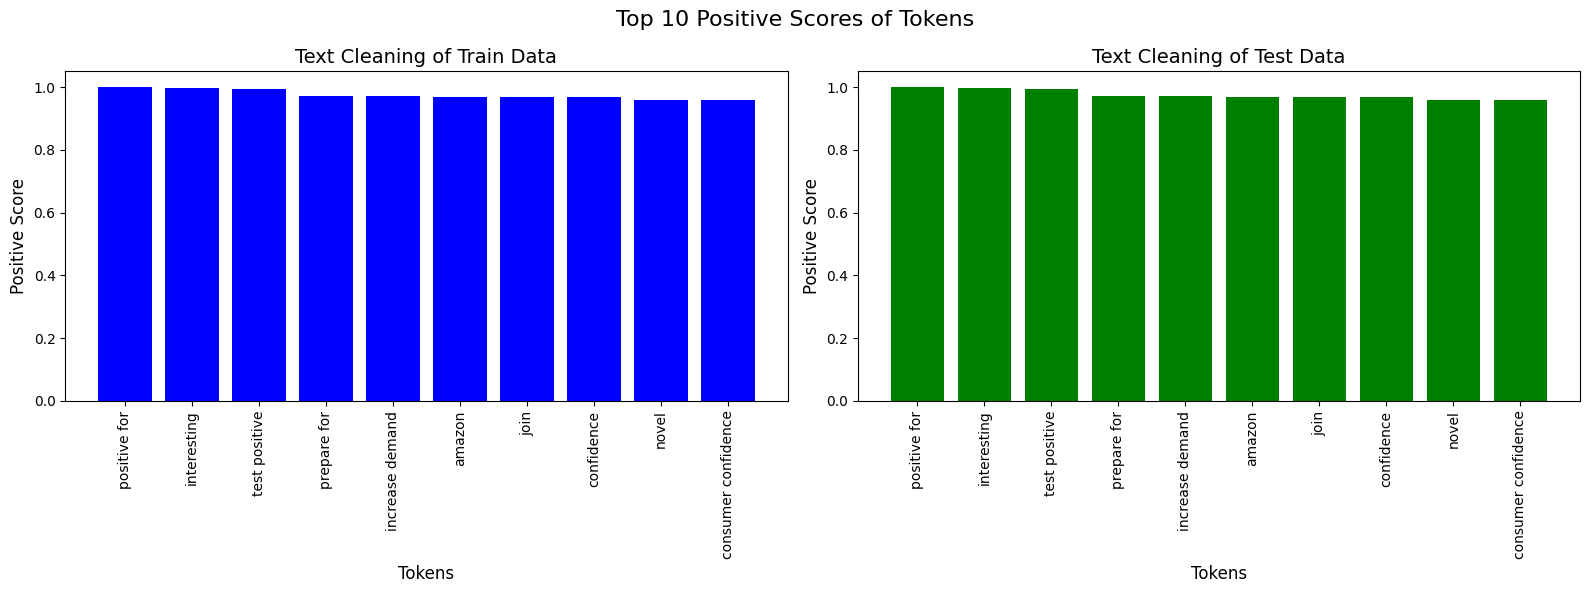

In [ ]:


top_n = 10
term_freq_df_ac_freq = term_freq_df_ac_Score.head(top_n)
term_freq_df_bc_freq = term_freq_df_bc_Score.head(top_n)
x = range(0, top_n)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Top 10 Positive Scores of Tokens', fontsize=16)


ax[0].bar(term_freq_df_bc_freq.index, term_freq_df_bc_freq["positive Score"], color='blue')
ax[0].set_title('Text Cleaning of Train Data', fontsize=14)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('Tokens', fontsize=12)
ax[0].set_ylabel('Positive Score', fontsize=12)


ax[1].bar(term_freq_df_ac_freq.index, term_freq_df_ac_freq["positive Score"], color='green')
ax[1].set_title('Text Cleaning of Test Data', fontsize=14)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_xlabel('Tokens', fontsize=12)
ax[1].set_ylabel('Positive Score', fontsize=12)

plt.tight_layout()
plt.show()

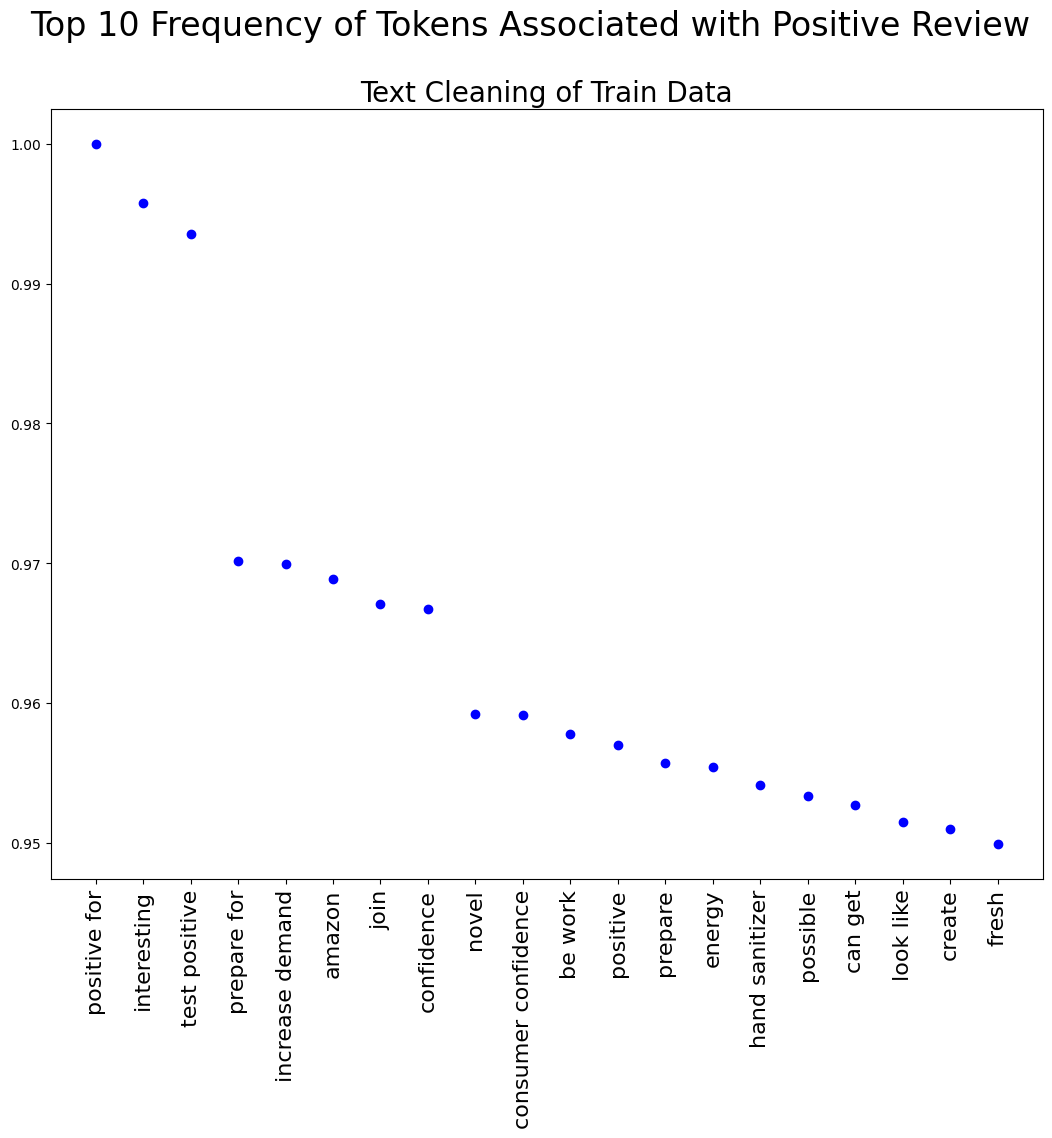

In [ ]:

top_n = 20
term_freq_df_ac_freq = term_freq_df_ac_Score.head(top_n)
term_freq_df_bc_freq = term_freq_df_bc_Score.head(top_n)
x = range(0, top_n)

fig, ax = plt.subplots(1, 1, figsize=(12.8, 10))

fig.suptitle('Top 10 Frequency of Tokens Associated with Positive Review', fontsize=24)


ax.plot(x, term_freq_df_bc_freq["positive Score"], 'bo')
ax.set_title('Text Cleaning of Train Data', fontsize=20)

ax.set_xticks(x)

x_ticks_labels = term_freq_df_bc_freq.index
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)


plt.show()

In [ ]:


vectorizer = CountVectorizer(ngram_range=(1, 2))

matrix = vectorizer.fit_transform(train_df['Tweet_texts'])

print(f'Feature matrix for the texts = {matrix.get_shape()}')
print(f'First row of the feature matrix = {matrix[0, ]}.')
print(f'The non zeros are {matrix[0, ].count_nonzero()}/{matrix.get_shape()[1]} in the feature matrix.')

Feature matrix for the texts = (32561, 348990)
First row of the feature matrix =   (0, 176965)	1
  (0, 19968)	2
  (0, 176991)	1
  (0, 20160)	1.
The non zeros are 4/348990 in the feature matrix.


In [ ]:


tfidf_vectorizer = TfidfVectorizer()
train_df = tfidf_vectorizer.fit_transform(train_df['Tweet_texts'])
test_df = tfidf_vectorizer.fit_transform(test_df['Tweet_texts'])

In [ ]:

cos_sim = cosine_similarity(tfidf_matrix[199], tfidf_matrix[19999])
print(f"Cosine Similarity in Tweet_texts between 200th and 20,000th tweets: {cos_sim}")

Cosine Similarity in Tweet_texts between 200th and 20,000th tweets: [[0.0520619]]


In [ ]:
corpus_vector = tfidf_matrix.mean(axis=0)
print(corpus_vector)

[[0.00084774 0.00026933 0.00146961 ... 0.00062287 0.00030163 0.00029139]]


In [ ]:
cleaned_train_df = cleaned_train_df.sample(frac=0.8, random_state=42)
cleaned_test_df = cleaned_test_df.sample(frac=0.8, random_state=42)

In [ ]:

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])


pipeline_rf.fit(cleaned_train_df['Tweet_texts'], cleaned_train_df['Sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [ ]:


predictions_rf = pipeline_rf.predict(cleaned_test_df['Tweet_texts'])

print("Random Forest Metrics:")
print(classification_report(cleaned_test_df['Sentiment'], predictions_rf))

accuracy = accuracy_score(cleaned_test_df['Sentiment'], predictions_rf)
precision = precision_score(cleaned_test_df['Sentiment'], predictions_rf, average='weighted')
recall = recall_score(cleaned_test_df['Sentiment'], predictions_rf, average='weighted')
f1 = f1_score(cleaned_test_df['Sentiment'], predictions_rf, average='weighted')

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Random Forest Metrics:
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.28      0.39       364
Extremely Positive       0.65      0.30      0.41       381
          Negative       0.43      0.40      0.41       653
           Neutral       0.52      0.64      0.57       400
          Positive       0.37      0.61      0.46       573

          accuracy                           0.46      2371
         macro avg       0.53      0.45      0.45      2371
      weighted avg       0.50      0.46      0.45      2371

Accuracy: 0.4555040067482075
Precision: 0.5015566184763974
Recall: 0.4555040067482075
F1 Score: 0.44795510683172546


In [ ]:

conf_matrix = confusion_matrix(cleaned_test_df['Sentiment'], predictions_rf)

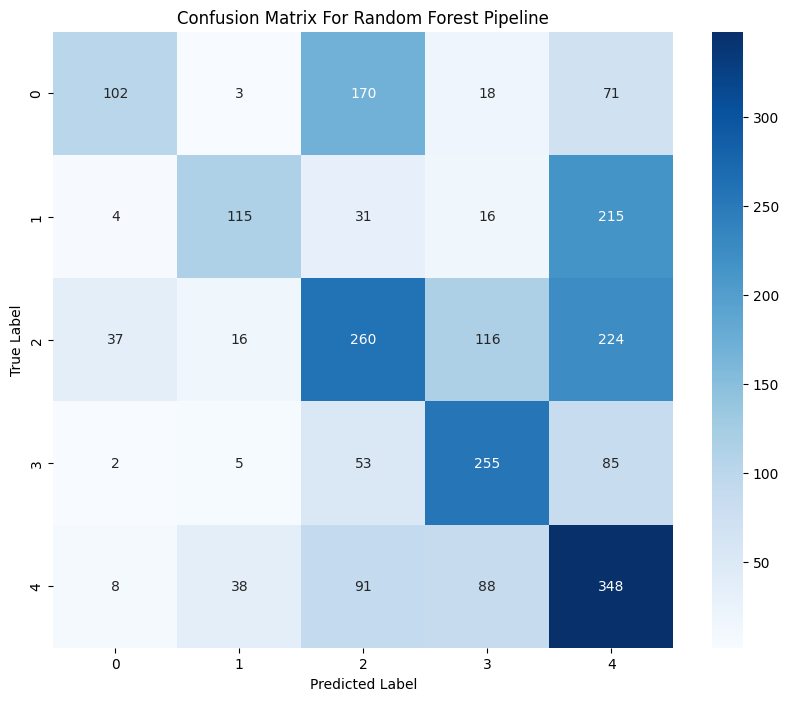

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.title('Confusion Matrix For Random Forest Pipeline')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Justification:**
With these metrics, it's clear that the first model is not performing well on the test dataset. The low accuracy, precision, recall, and F1-scores across various sentiment categories suggest that the model is not accurately capturing the underlying patterns in the data to make reliable predictions.

In [ ]:


param_grid = {
    'tfidf__max_features': [500, 1000],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10]
}


grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(cleaned_train_df['Tweet_texts'], cleaned_train_df['Sentiment'])


print(grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'clf__max_depth': None, 'clf__n_estimators': 200, 'tfidf__max_features': 1000}


In [ ]:

best_model = grid_search.best_estimator_

predictions_tuned = best_model.predict(cleaned_test_df['Tweet_texts'])


print("Tuned Random Forest Metrics:")
print(classification_report(cleaned_test_df['Sentiment'], predictions_tuned))

accuracy_tuned = accuracy_score(cleaned_test_df['Sentiment'], predictions_tuned)
precision_tuned = precision_score(cleaned_test_df['Sentiment'], predictions_tuned, average='weighted')
recall_tuned = recall_score(cleaned_test_df['Sentiment'], predictions_tuned, average='weighted')
f1_tuned = f1_score(cleaned_test_df['Sentiment'], predictions_tuned, average='weighted')

print(f"Tuned Accuracy: {accuracy_tuned}")
print(f"Tuned Precision: {precision_tuned}")
print(f"Tuned Recall: {recall_tuned}")
print(f"Tuned F1 Score: {f1_tuned}")

Tuned Random Forest Metrics:
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.44      0.50       364
Extremely Positive       0.61      0.42      0.50       381
          Negative       0.45      0.38      0.41       653
           Neutral       0.53      0.59      0.56       400
          Positive       0.39      0.57      0.46       573

          accuracy                           0.48      2371
         macro avg       0.51      0.48      0.49      2371
      weighted avg       0.50      0.48      0.48      2371

Tuned Accuracy: 0.4765921552087727
Tuned Precision: 0.49584446725694614
Tuned Recall: 0.4765921552087727
Tuned F1 Score: 0.4760908974386397


In [ ]:

conf_matrix = confusion_matrix(cleaned_test_df['Sentiment'], predictions_tuned)

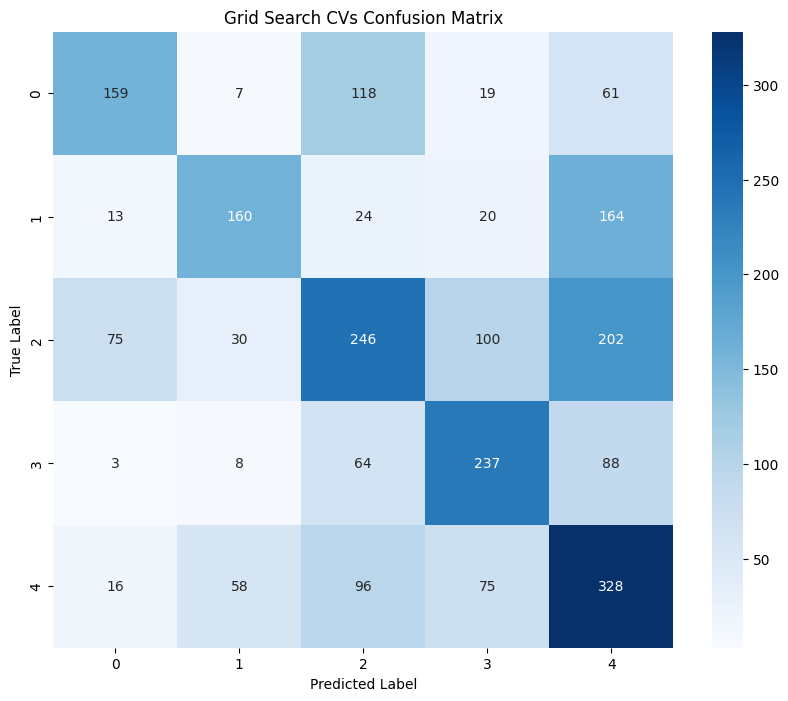

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.title('Grid Search CVs Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Justification:** While the tuned second model might be better than a simple baseline, it is likely not a good model for the task of sentiment forecasting.The tuned second model, despite some improvements over a simple baseline, exhibits suboptimal performance for sentiment forecasting, as indicated by its low accuracy, precision, recall, and F1-scores.  It is recommended to consider more advanced techniques and potentially explore other model architectures to achieve better results.

In [ ]:


pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

param_grid_lr = {
    'tfidf__max_features': [500, 1000],
    'clf__C': [0.1, 1],
}

param_grid_svc = {
    'tfidf__max_features': [500, 1000],
    'clf__C': [0.1, 1],
    'clf__gamma': ['scale'],
}

param_grid_rf = {
    'tfidf__max_features': [500, 1000],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10],
}

In [ ]:
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=3, n_jobs=-1)
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=3, n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, n_jobs=-1)

grid_search_lr.fit(cleaned_train_df['Tweet_texts'], cleaned_train_df['Sentiment'])
grid_search_svc.fit(cleaned_train_df['Tweet_texts'], cleaned_train_df['Sentiment'])
grid_search_rf.fit(cleaned_train_df['Tweet_texts'], cleaned_train_df['Sentiment'])

predictions_lr = grid_search_lr.predict(cleaned_test_df['Tweet_texts'])
predictions_svc = grid_search_svc.predict(cleaned_test_df['Tweet_texts'])
predictions_rf = grid_search_rf.predict(cleaned_test_df['Tweet_texts'])

print("Logistic Regression Metrics:")
print(classification_report(cleaned_test_df['Sentiment'], predictions_lr))

print("Support Vector Machine Metrics:")
print(classification_report(cleaned_test_df['Sentiment'], predictions_svc))

print("Random Forest Metrics:")
print(classification_report(cleaned_test_df['Sentiment'], predictions_rf))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
                    precision    recall  f1-score   support

Extremely Negative       0.55      0.46      0.50       364
Extremely Positive       0.63      0.49      0.55       381
          Negative       0.48      0.42      0.45       653
           Neutral       0.54      0.66      0.60       400
          Positive       0.44      0.55      0.49       573

          accuracy                           0.51      2371
         macro avg       0.53      0.52      0.52      2371
      weighted avg       0.52      0.51      0.51      2371

Support Vector Machine Metrics:
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.39      0.48       364
Extremely Positive       0.71      0.45      0.55       381
          Negative       0.48      0.49      0.49       653
           Neutral       0.57      0.66      0.61       400
          Positive       0.43      0.60      0.50       573

          accuracy                

In [ ]:

accuracy_lr = accuracy_score(cleaned_test_df['Sentiment'], predictions_lr)
accuracy_svc = accuracy_score(cleaned_test_df['Sentiment'], predictions_svc)
accuracy_rf = accuracy_score(cleaned_test_df['Sentiment'], predictions_rf)

precision_lr = precision_score(cleaned_test_df['Sentiment'], predictions_lr, average='weighted')
precision_svc = precision_score(cleaned_test_df['Sentiment'], predictions_svc, average='weighted')
precision_rf = precision_score(cleaned_test_df['Sentiment'], predictions_rf, average='weighted')

recall_lr = recall_score(cleaned_test_df['Sentiment'], predictions_lr, average='weighted')
recall_svc = recall_score(cleaned_test_df['Sentiment'], predictions_svc, average='weighted')
recall_rf = recall_score(cleaned_test_df['Sentiment'], predictions_rf, average='weighted')

f1_lr = f1_score(cleaned_test_df['Sentiment'], predictions_lr, average='weighted')
f1_svc = f1_score(cleaned_test_df['Sentiment'], predictions_svc, average='weighted')
f1_rf = f1_score(cleaned_test_df['Sentiment'], predictions_rf, average='weighted')


print("Model Diagnostics for Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print()

print("Model Diagnostics for Support Vector Machine:")
print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")
print()

print("Model Diagnostics for Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Model Diagnostics for Logistic Regression:
Accuracy: 0.509067903838043
Precision: 0.516778649093631
Recall: 0.509067903838043
F1 Score: 0.5077787799834728

Model Diagnostics for Support Vector Machine:
Accuracy: 0.5204555040067482
Precision: 0.5460465358837043
Recall: 0.5204555040067482
F1 Score: 0.5200468460410079

Model Diagnostics for Random Forest:
Accuracy: 0.46520455504006747
Precision: 0.48560794339723046
Recall: 0.46520455504006747
F1 Score: 0.46507964567490123


In [ ]:

conf_matrix = confusion_matrix(cleaned_test_df['Sentiment'], predictions_lr)

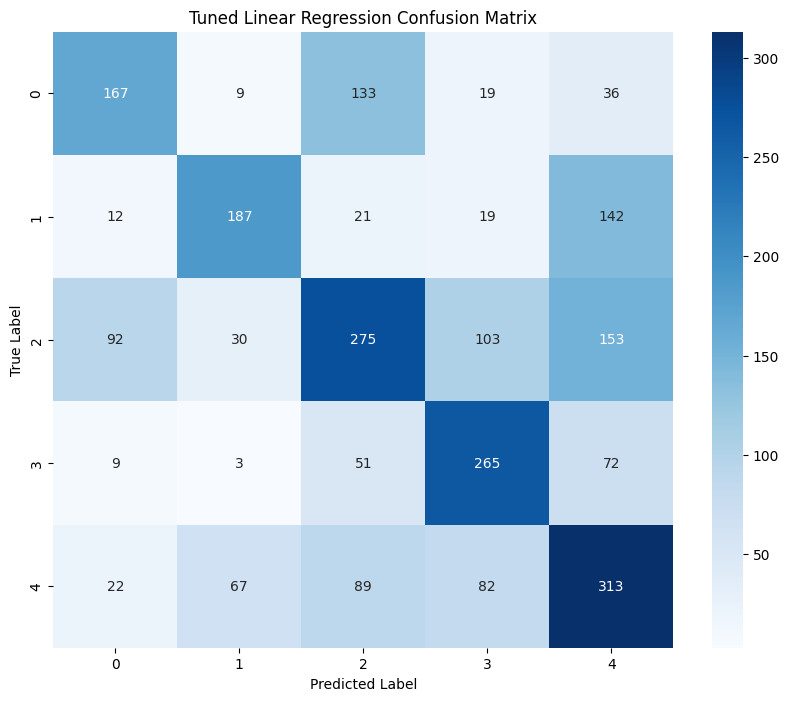

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.title('Tuned Linear Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

conf_matrix = confusion_matrix(cleaned_test_df['Sentiment'], predictions_svc)

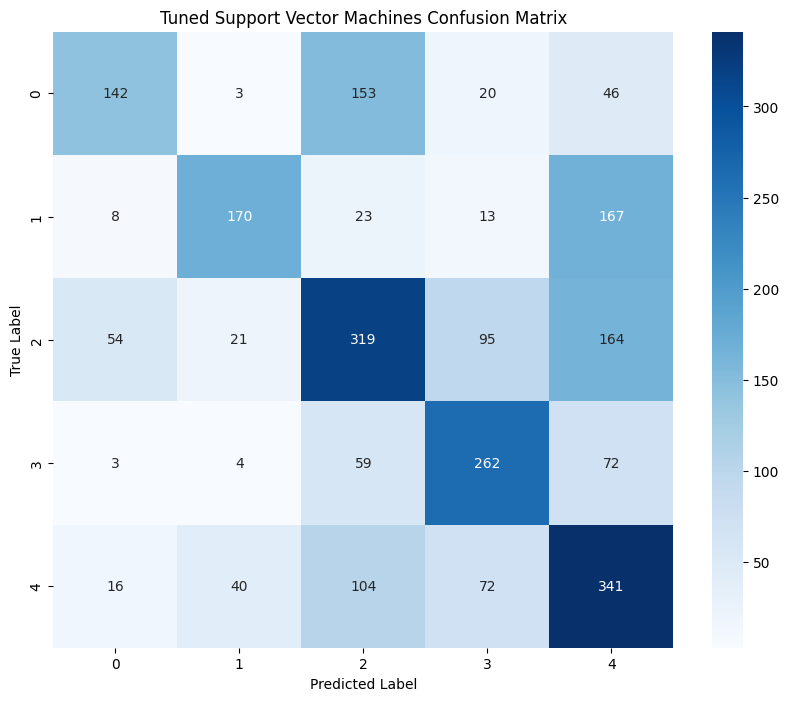

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.title('Tuned Support Vector Machines Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

conf_matrix = confusion_matrix(cleaned_test_df['Sentiment'], predictions_rf)

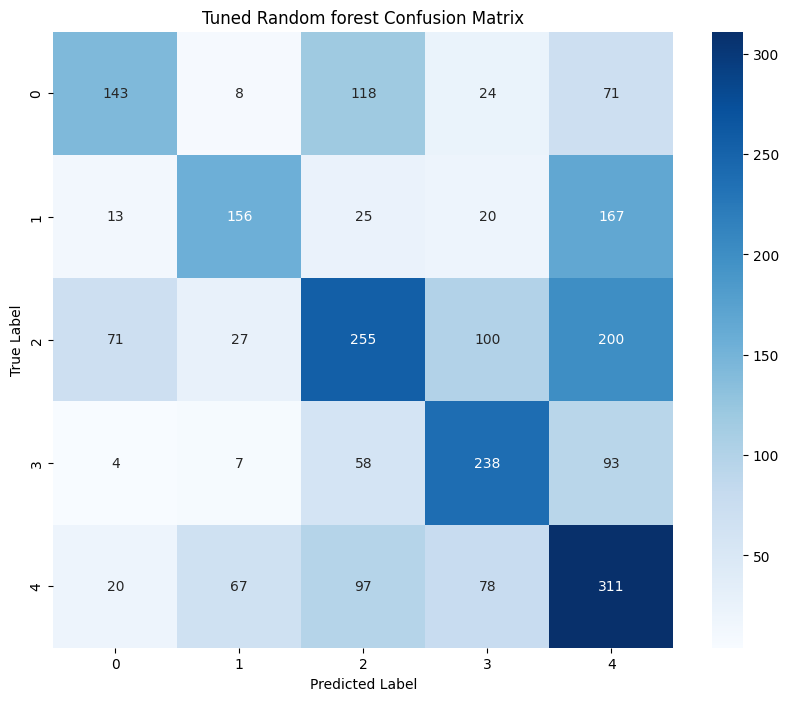

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',)
plt.title('Tuned Random forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Justification:**  Based on the metrics, the Support Vector Machine (SVM) appears to be the best-performing model among the three, although it's crucial to acknowledge that none of the models exhibit particularly strong performance.While SVM shows marginally better performance, it's essential to consider the context of your task and the desired level of accuracy. An accuracy of around 0.52 might not be sufficient for many real-world applications

In [ ]:


count_vectorizer = CountVectorizer(max_df=0.90, min_df=5, stop_words='english')

document_word_matrix_count = count_vectorizer.fit_transform(cleaned_train_df['Tweet_texts'])

n_topics = 5


lda_count = LatentDirichletAllocation(n_components=n_topics, random_state=101)
lda_count.fit(document_word_matrix_count)


def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(1, n_topics, figsize=(30, 15), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

count_feature_names = count_vectorizer.get_feature_names_out()

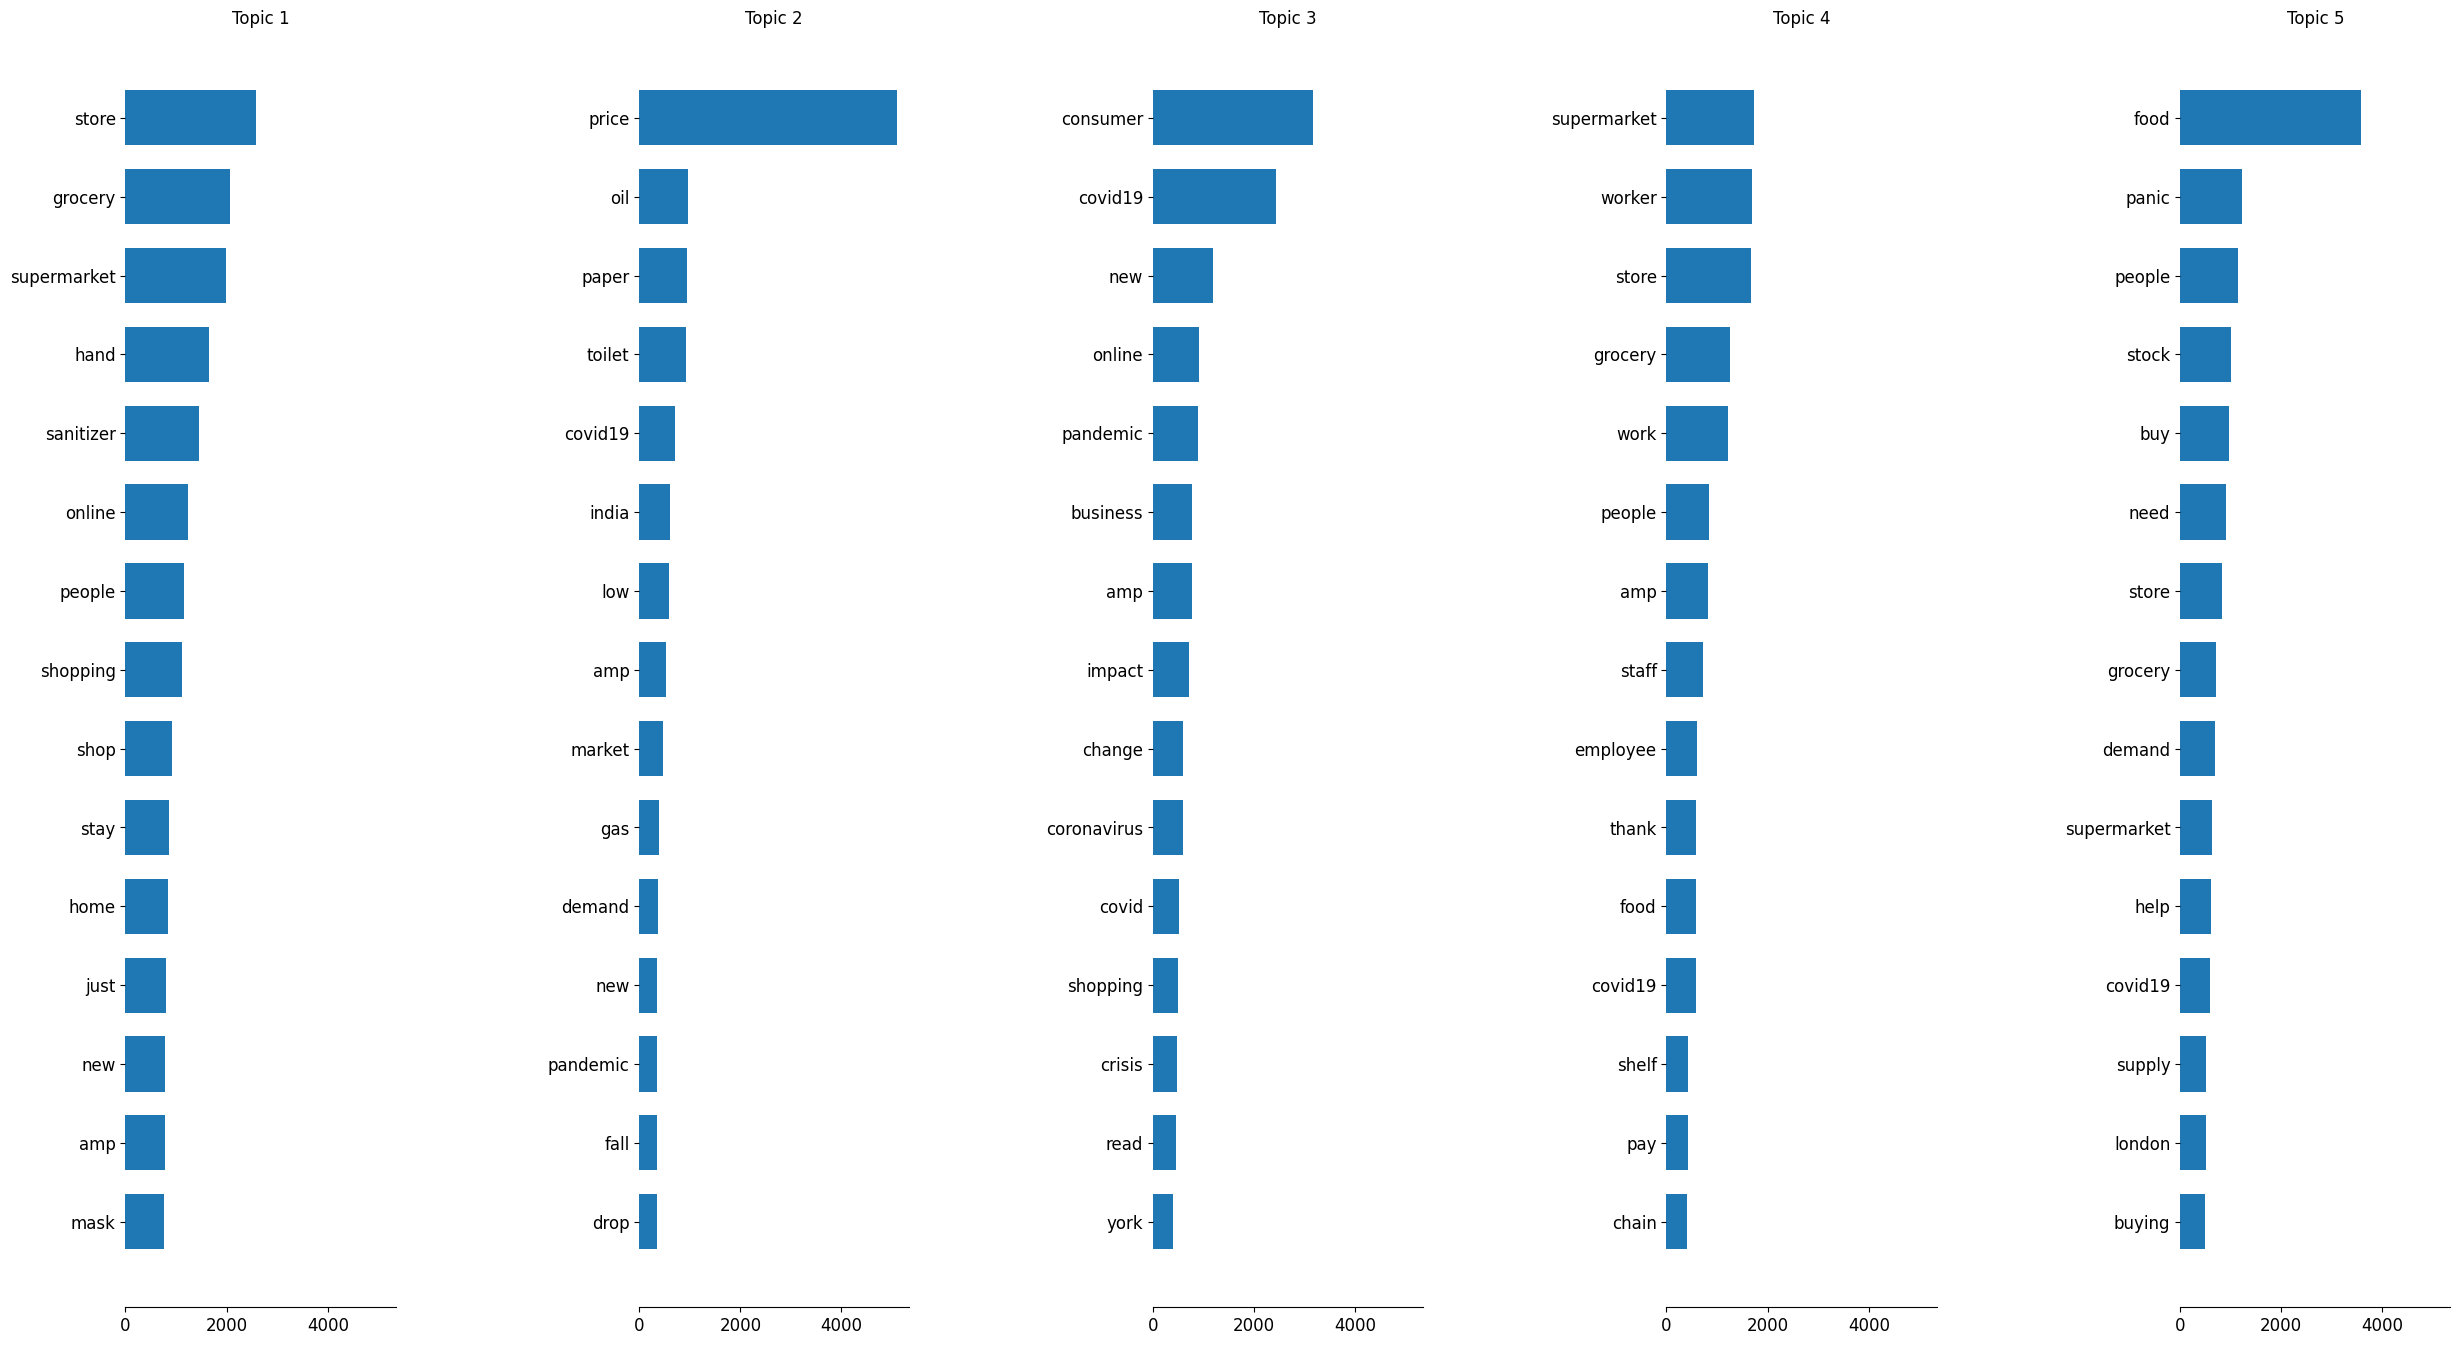

In [ ]:
plot_top_words(lda_count, count_feature_names, 15)

In [ ]:


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.90, min_df=5)

document_word_matrix_tfidf = tfidf_vectorizer.fit_transform(cleaned_train_df['Tweet_texts'])

n_topics = 5

# Building LDA model
lda_tfidf = LatentDirichletAllocation(n_components=n_topics, random_state=101)
lda_tfidf.fit(document_word_matrix_tfidf)

LatentDirichletAllocation(n_components=5, random_state=101)

In [ ]:
def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(1, n_topics, figsize=(30, 15), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

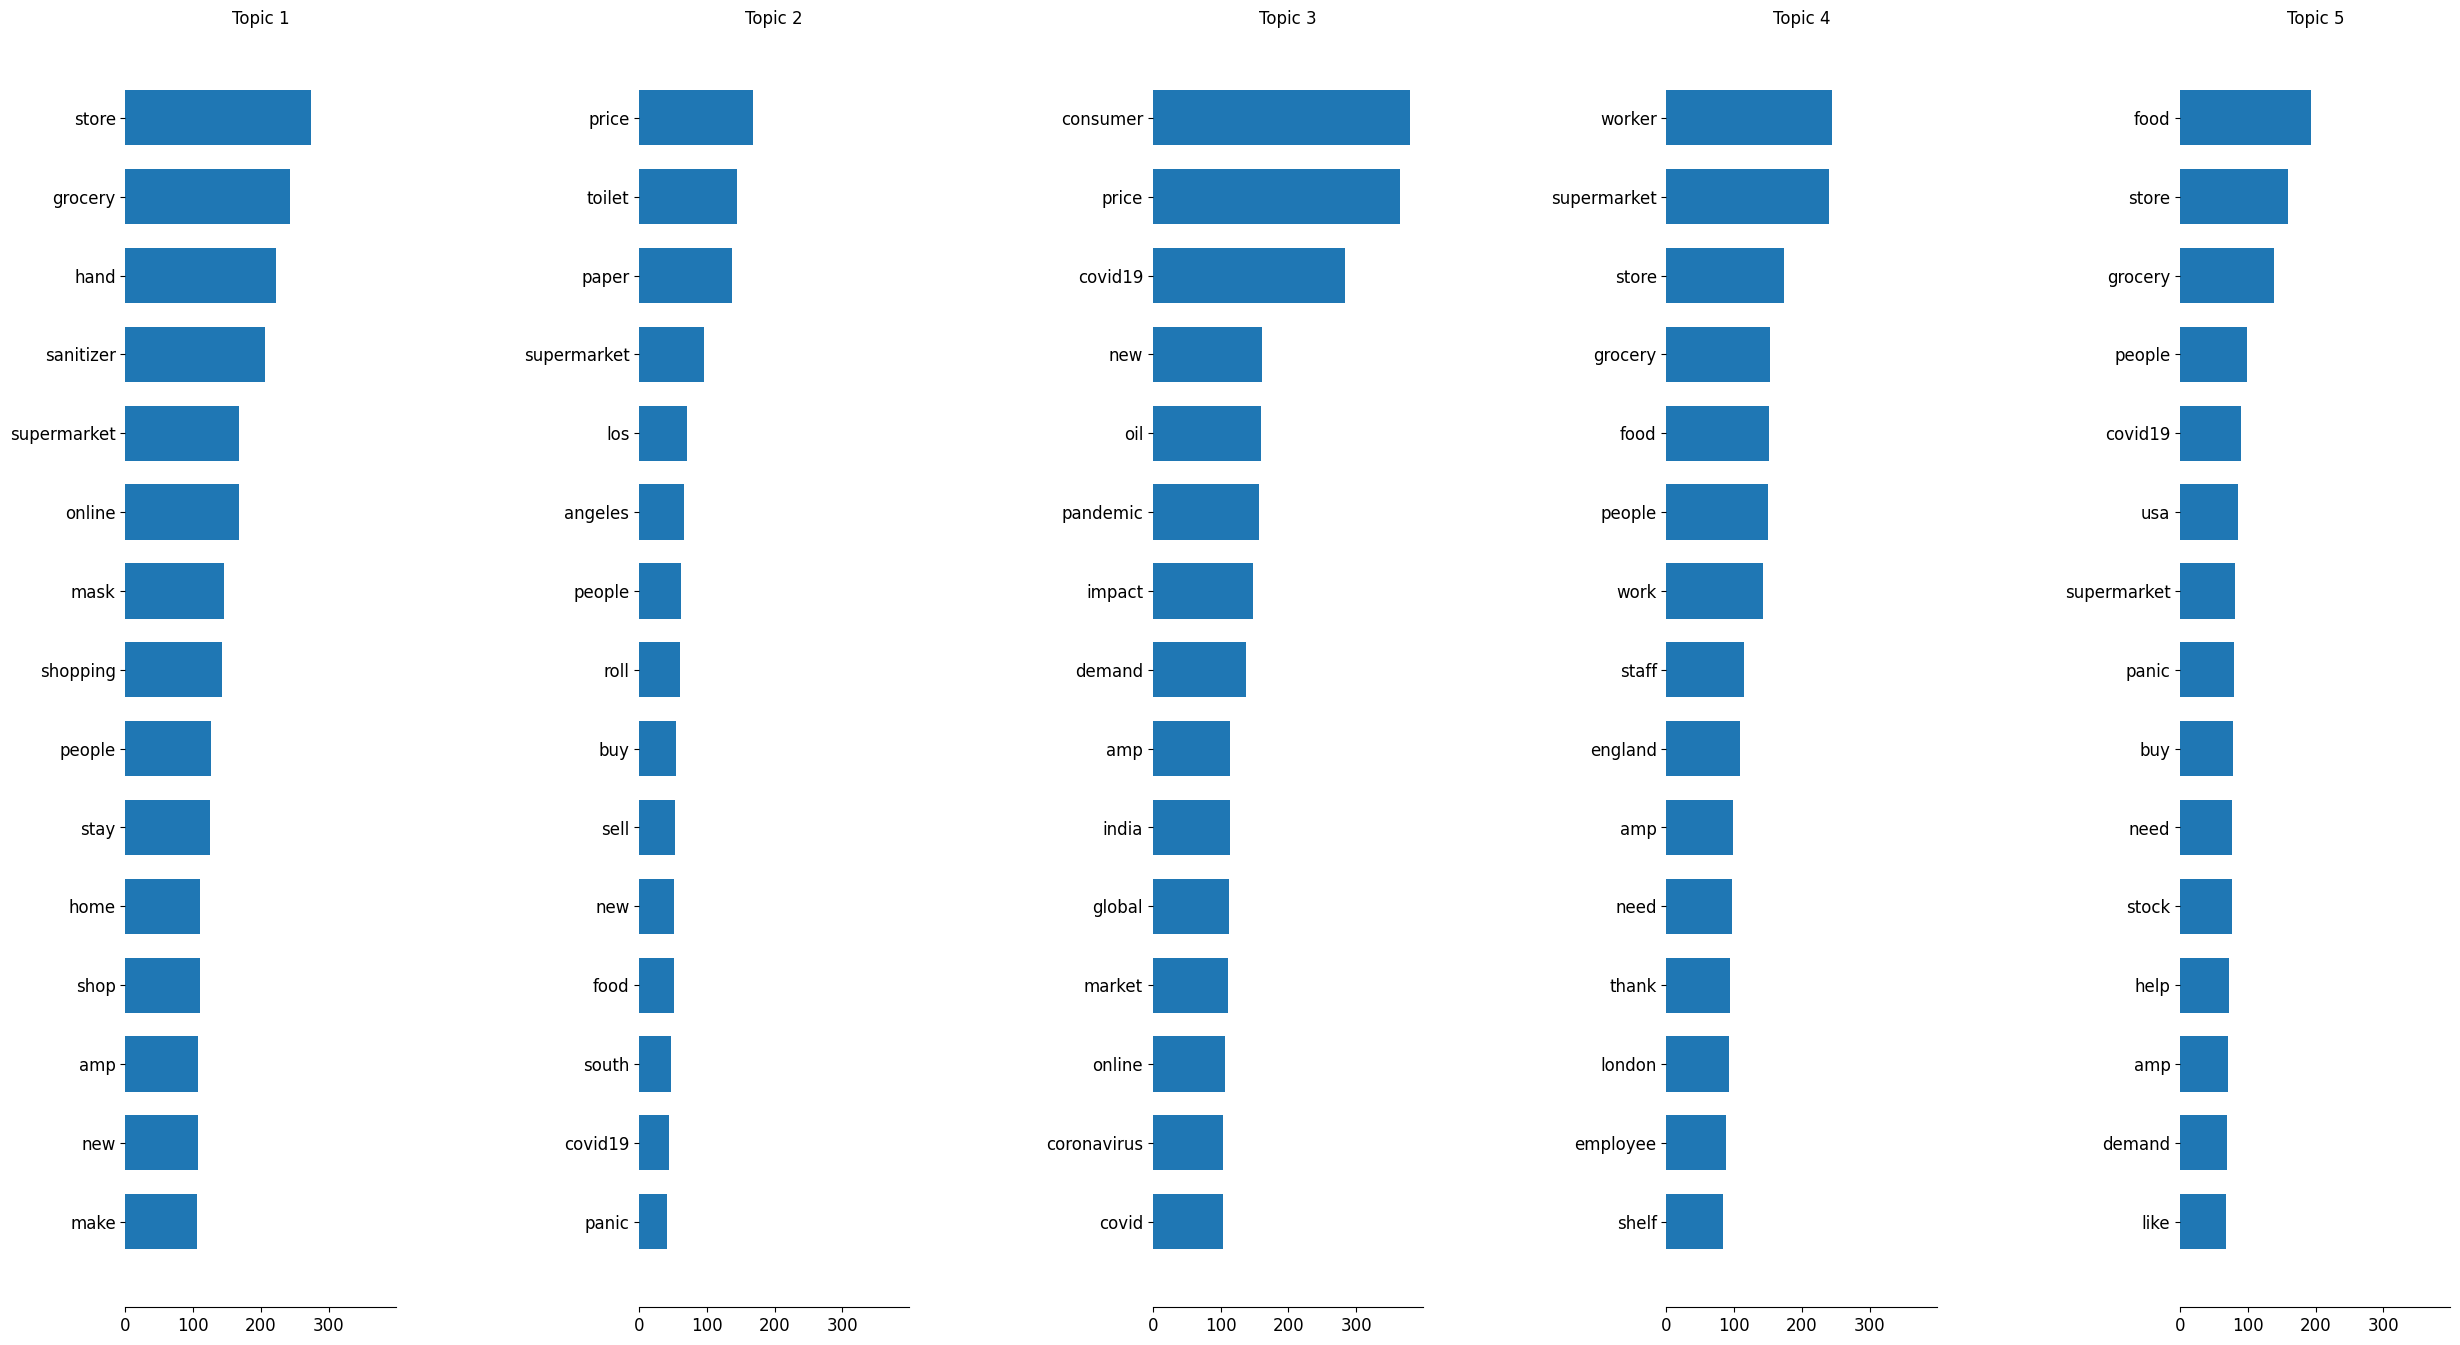

In [ ]:
plot_top_words(lda_tfidf, tfidf_feature_names, 15)

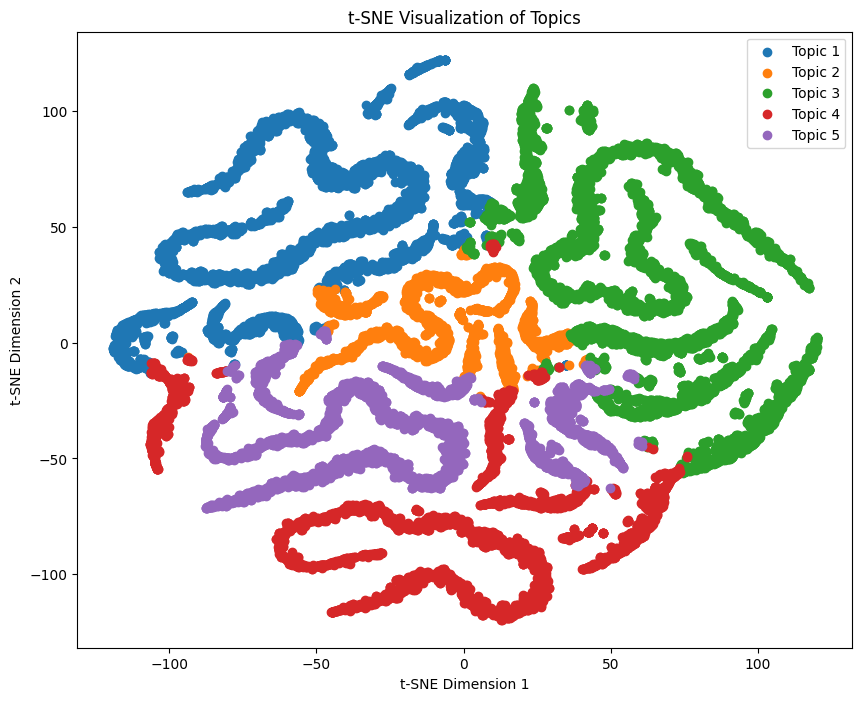

In [ ]:



topic_probabilities = lda_tfidf.transform(document_word_matrix_tfidf)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
topic_coordinates = tsne.fit_transform(topic_probabilities)


topic_df = pd.DataFrame(topic_coordinates, columns=['x', 'y'])
topic_df['topic'] = np.argmax(topic_probabilities, axis=1)

plt.figure(figsize=(10, 8))
for topic in range(n_topics):
    plt.scatter(topic_df[topic_df['topic'] == topic]['x'],
                topic_df[topic_df['topic'] == topic]['y'],
                label=f'Topic {topic + 1}')
plt.title('t-SNE Visualization of Topics')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()